In [25]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape the data to (num_samples, 784) and normalize
input_size = x_train.shape[1] * x_train.shape[2]  # 28*28 = 784
x_train = np.reshape(x_train, [-1, input_size]).astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size]).astype('float32') / 255

# Print the shapes for verification
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


x_train shape: (60000, 784)
x_test shape: (10000, 784)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# Parameters
batch_size = 128
hidden_units = 256
dropout = 0.45
num_labels = y_train.shape[1]  # 10 for MNIST

# Define the model
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.1)


Epoch 1/20


c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7519 - loss: 0.7818 - val_accuracy: 0.9633 - val_loss: 0.1276
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9350 - loss: 0.2140 - val_accuracy: 0.9715 - val_loss: 0.0960
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9523 - loss: 0.1633 - val_accuracy: 0.9757 - val_loss: 0.0817
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9610 - loss: 0.1307 - val_accuracy: 0.9778 - val_loss: 0.0730
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9634 - loss: 0.1196 - val_accuracy: 0.9815 - val_loss: 0.0671
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9675 - loss: 0.1065 - val_accuracy: 0.9803 - val_loss: 0.0612
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9693 - loss: 0.0980 - val_accuracy: 0.9800 - val_loss: 0.0688
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9714 - loss: 0.0885 - val_accuracy: 0.9828 - val_

In [27]:
# Evaluate the model on test data
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc * 100:.2f}%")


Test Loss: 0.0621
Test Accuracy: 98.25%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class: 2


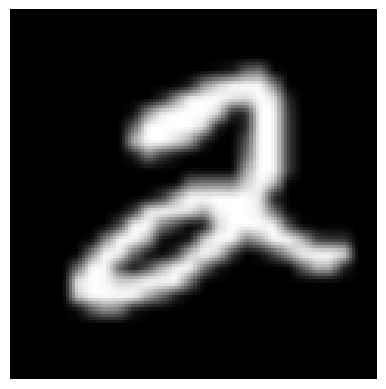

In [28]:
import cv2
import matplotlib.pyplot as plt

# Load an external image and make a prediction
image_path = r"C:\Users\ravi\Desktop\ME\RAVI\2pic.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Preprocess the image (resize, normalize, reshape)
img_resized = cv2.resize(img, (28, 28))
img_normalized = img_resized / 255.0
img_reshaped = img_normalized.reshape(1, input_size)  # Reshape to (1, 784)

# Make a prediction using the model
prediction = model.predict(img_reshaped)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted Class: {predicted_class[0]}')

# Display the original image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Confusion Matrix:
 [[ 971    1    1    0    0    0    4    0    2    1]
 [   0 1128    3    0    0    0    2    0    2    0]
 [   2    2 1012    5    1    0    1    4    5    0]
 [   0    0    6  997    0    1    0    4    2    0]
 [   1    3    4    0  956    0    6    2    2    8]
 [   2    1    0    9    1  871    3    1    2    2]
 [   1    2    0    0    1    4  949    0    1    0]
 [   0    6    6    0    0    0    0 1011    1    4]
 [   4    0    1    3    4    1    0    2  956    3]
 [   3    3    0    8   10    2    0    4    5  974]]

Accuracy: 98.25%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.98      0

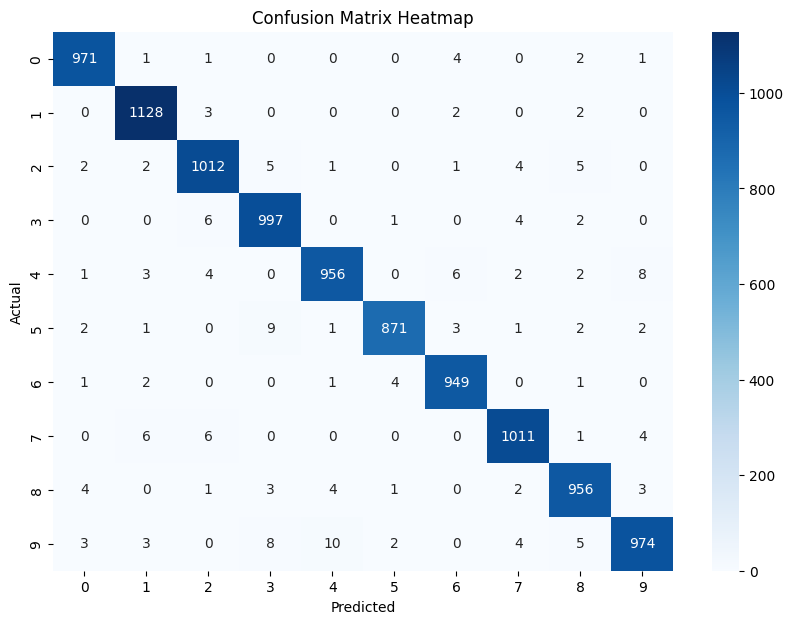

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def cal_accuracy(y_test, predicted_class):
    # Ensure y_test is in label form, not one-hot
    if len(y_test.shape) > 1 and y_test.shape[1] > 1:
        y_test = np.argmax(y_test, axis=1)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, predicted_class)
    
    # Print the confusion matrix
    print("\nConfusion Matrix:\n", cm)
    
    # Print the accuracy
    accuracy = accuracy_score(y_test, predicted_class) * 100
    print("\nAccuracy: {:.2f}%".format(accuracy))
    
    # Print the classification report
    print("\nClassification Report:\n", classification_report(y_test, predicted_class))
    
    # Plotting the confusion matrix heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

# Make predictions on test data
y_pred = model.predict(x_test)
predicted_class = np.argmax(y_pred, axis=1)

# Call the function with the correct arguments
cal_accuracy(y_test, predicted_class)


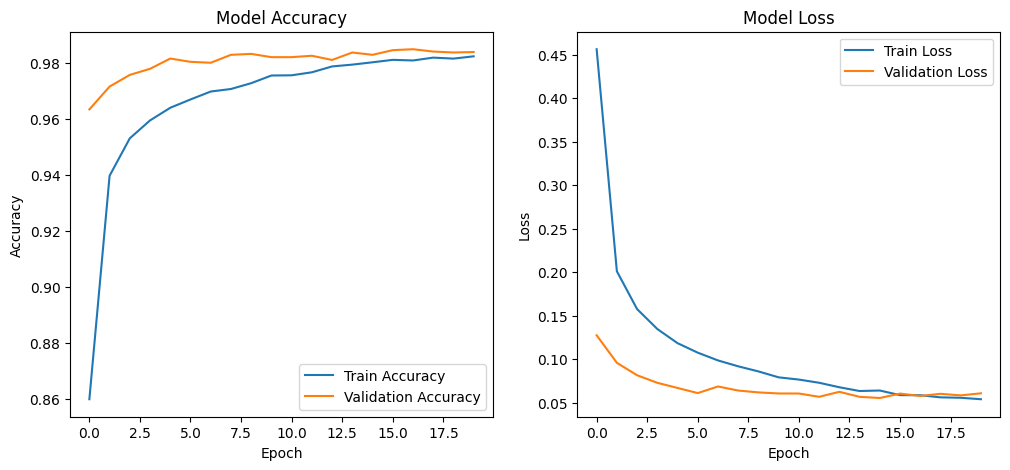

In [30]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
